# II.CREDIT CARD FRAUD DETECTION

###### This project aims to develop a model that would detect fradulalent credit card transactions. The major difference in this project is that the classes will be highly imbalanced.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
#lets assess the shape of the data frame
df.shape

(284807, 31)

In [4]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
#Checking for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#Lets check the distribution of the class
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

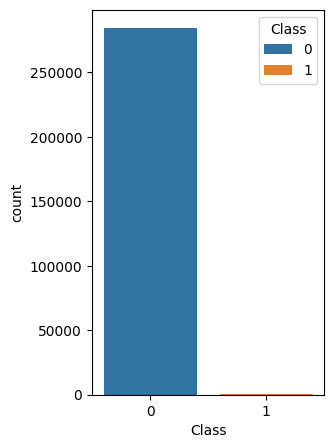

In [7]:
plt.figure(figsize=(3,5))
sns.countplot(data=df,x='Class',hue='Class')

##### From the above graph we can really see how imbalanced the classes really are. The class 1 is the fradulent class.Let's see what percentage of the total transactions are fradualent.

In [8]:
print(f"Percentage of Fradulent transactions :{round((len(df[df['Class']==1])/df.shape[0])*100,2)}%")
print('---'*25)
print(f"Percentage of Non Fradulent transactions :{round((len(df[df['Class']==0])/df.shape[0])*100,2)}%")

Percentage of Fradulent transactions :0.17%
---------------------------------------------------------------------------
Percentage of Non Fradulent transactions :99.83%


<Axes: xlabel='Time', ylabel='Amount'>

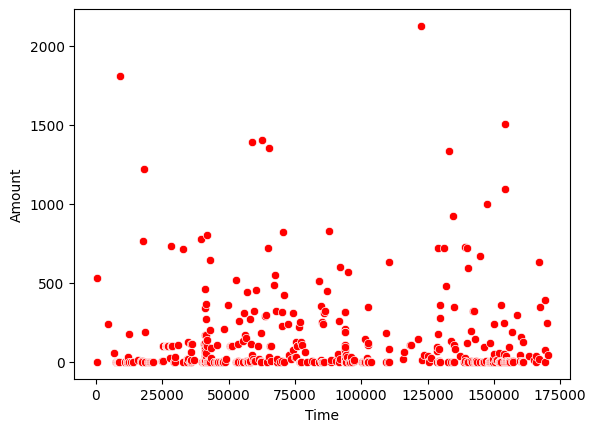

In [9]:
#Relationship between amount,time and fradulent transactions
sns.scatterplot(data=df[df['Class']==1],x='Time',y='Amount',color='red')

<Axes: >

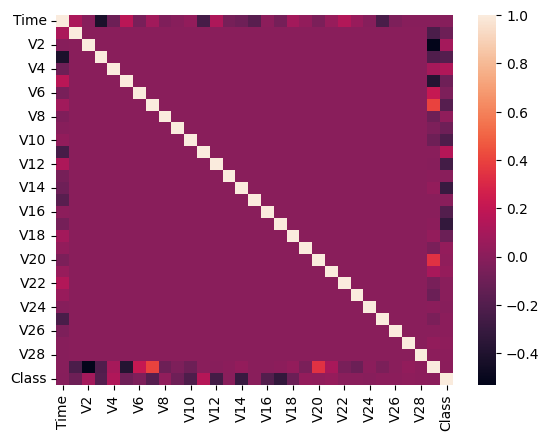

In [10]:
#Feature Correlation
sns.heatmap(df.corr())

In [11]:
X=df.drop('Class',axis=1)
y=df['Class']

In [12]:
#Spliting the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2018)

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
y_ped=rfc_model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_test,y_pred)

0.9997401758377573

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

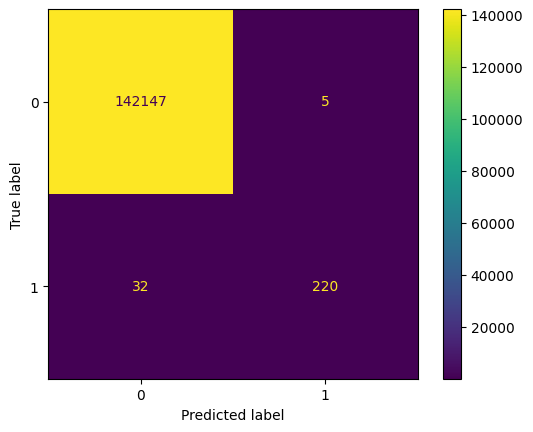

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test,y_ped)

In [20]:
#Let's try various other algorithms such as Boosting and KNN which are suitable for overlaped data

In [34]:
feat_imp=pd.DataFrame(data=rfc_model.feature_importances_,index=X.columns,columns=['Importance']).sort_values('Importance',ascending=False)

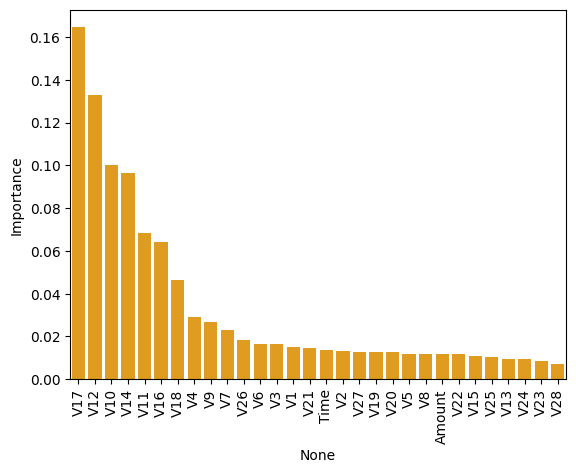

In [41]:
sns.barplot(data=feat_imp,x=feat_imp.index,y='Importance',color='orange')
plt.xticks(rotation=90);

In [64]:
accuracy_array=[]
accuracy_array.append(round(accuracy_score(y_test,y_ped),5))
error_array=[]
error_array.append(1-round(accuracy_score(y_test,y_ped),5))

In [42]:
#Boosting Classifiers
from sklearn.ensemble import AdaBoostClassifier
ada_model=AdaBoostClassifier()

In [43]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier()

In [65]:
y_pred=ada_model.predict(X_test)

In [66]:
accuracy_score(y_test,y_pred) #Random forest still performs better

0.9992556388865481

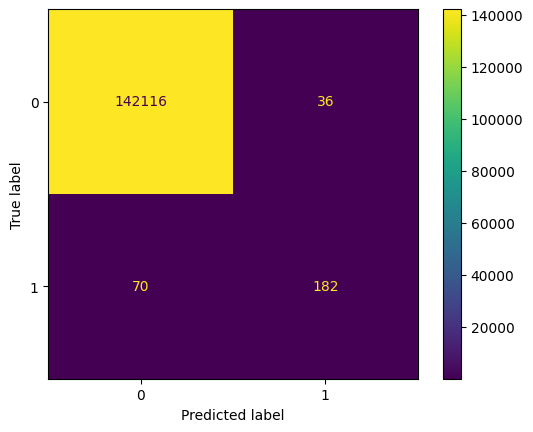

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred) 

In [47]:
#We can infer how there are a lot more false positives and false negatives when compared to Random forest Classifier

In [67]:
accuracy_array.append(round(accuracy_score(y_test,y_pred),5))
error_array.append(1-round(accuracy_score(y_test,y_pred),5))

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
grad_model=GradientBoostingClassifier()

In [51]:
grad_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [68]:
y_pred=grad_model.predict(X_test)

In [69]:
accuracy_score(y_test,y_pred) #Random forest still performs better

0.9984761663998202

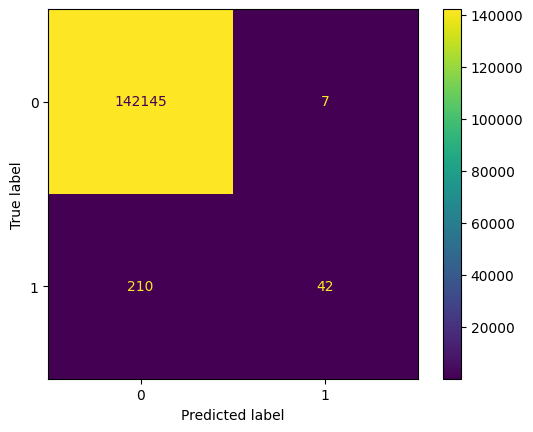

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred) 

In [70]:
accuracy_array.append(round(accuracy_score(y_test,y_pred),5))
error_array.append(1-round(accuracy_score(y_test,y_pred),5))

In [72]:
arr_name=['RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier']
result=pd.DataFrame({'Model Name':arr_name,'Accuracy Score':accuracy_array,'Error ':error_array})


## Conclusion:

In [73]:
result

,Model Name,Accuracy Score,Error
0,RandomForestClassifier,0.99974,0.00026
1,AdaBoostClassifier,0.99926,0.00074
2,GradientBoostingClassifier,0.99848,0.00152
